In [1]:
import numpy as np
X = np.load('/content/drive/My Drive/Colab Notebooks/data/_hg/X_data.npy')
y = np.load('/content/drive/My Drive/Colab Notebooks/data/_hg/y_data.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/data/_hg/X_data.npy'

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
import keras
import keras.utils as utils

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.python.client import device_lib

Using TensorFlow backend.
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [6]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/data/_hg/hand_written_korean_classification.hdf5')

W0330 13:32:00.472740 22520 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0330 13:32:00.532569 22520 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0330 13:32:00.579442 22520 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0330 13:32:00.583432 22520 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0330 13:32:00.583432 22520 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133

In [7]:
!pip install lime

In [8]:
import lime
from lime import lime_image

In [9]:
explainer = lime_image.LimeImageExplainer()

In [10]:
explanation = explainer.explain_instance(X_test[0], model.predict, top_labels = 5, hide_color = 0, num_samples = 1000)

100% |########################################################################|


In [11]:
from skimage.segmentation import mark_boundaries

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 5, hide_rest = False)

W0330 13:32:28.493799 22520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


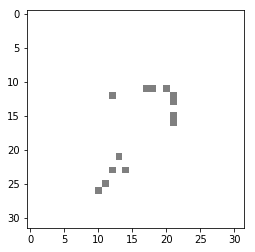

In [15]:
import matplotlib.pyplot as plt
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))

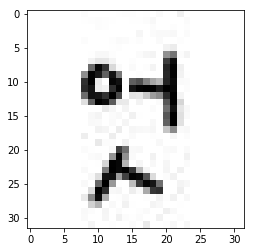

In [14]:
plt.imshow(X_test[0])